# Zeeza Bank Of India

Predicting If A Client Will Make A Fixed Deposit Or Not

In [1]:
# importing libraries
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt 
import seaborn as sn                   # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# checking for the columns in each
train.columns, test.columns

(Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
        'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
        'pdays', 'previous', 'poutcome', 'subscribed'],
       dtype='object'),
 Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
        'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
        'pdays', 'previous', 'poutcome'],
       dtype='object'))

It can be infered that **subscribed** is the target variable as it is not present in the test dataset. Let's look at the shape of the dataset.

In [4]:
# checking for row's and column's in each
train.shape, test.shape

((31647, 18), (13564, 17))

We have 17 independent variables and 1 target variable, i.e. subscribed in the train dataset. We have similar features in the test dataset as the train dataset except the subscribed. We will predict the subscribed with the help of model built using the train data.

In [5]:
# we infer for missing values and type of variable
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


We can see there are two format of data types:

1. **object**: Object format means variables are categorical. Categorical variables in our dataset are: job, marital, education, default, housing, loan, contact, month, poutcome, subscribed

2. **int64**: It represents the integer variables. Integer variables in our dataset are: ID, age, balance, day, duration, campaign, pdays, previous

We can also see that there're no missing values in train data set, 31647 rows filled for each

In [6]:
# printing first 5 rows of the data set
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


# Univariate Analysis - Target Variable

Now Let's look at the distribution of our target variable, i.e. subscribed. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

In [7]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [8]:
# Normalize can be set to True to print proportions instead of number 
train['subscribed'].value_counts(normalize = True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

<AxesSubplot:>

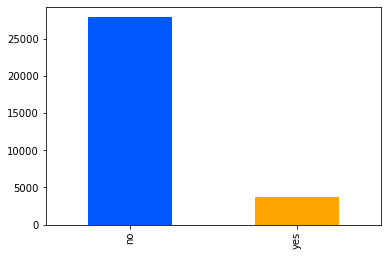

In [9]:
# plotting the bar plot of frequencies
color = ['#0059FF', '#FFA500']
train['subscribed'].value_counts().plot.bar(color = color)

So, 3715 users out of total 31647 have subscribed which is around 12%. Let's now explore the variables to have a better understanding of the dataset. We will first explore the variables individually using univariate analysis, then we will look at the relation between various independent variables and the target variable. We will also look at the correlation plot to see which variables affects the target variable most.

Let's first look  at the distribution of age variable to see how many people belongs to a particular age group.

<AxesSubplot:xlabel='age', ylabel='Density'>

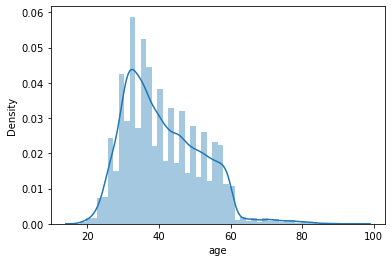

In [10]:
sn.distplot(train["age"])

We can infer that most of the clients fall in the age group between 20-60. Now let's look at what are the different types of jobs of the clients. As job is a categorical variable, we will look at its frequency table

In [11]:
train['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

<AxesSubplot:>

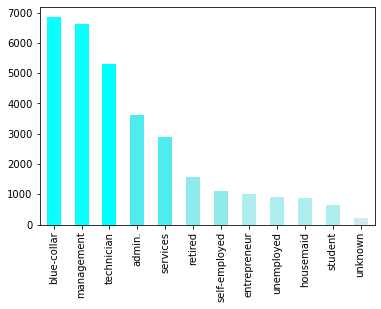

In [12]:
color = ['#0AFFFF','#0AFFFF','#00FFFF','#50EBEC','#50EBEC','#8EEBEC','#8EEBEC','#AFEEEE','#AFEEEE','#AFEEEE','#AFEEEE','#CFECEC']
train['job'].value_counts().plot.bar(color = color)

We see that most of the clients belongs to blue-collar job and the students are least in number as students generally do not take a term deposit. Let's also look at how many clients have default history.

<AxesSubplot:>

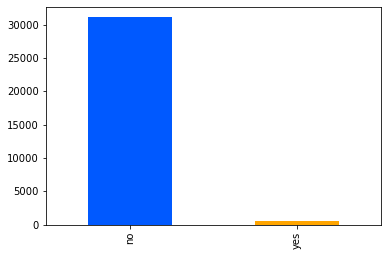

In [13]:
color = ['#0059FF', '#FFA500']
train['default'].value_counts().plot.bar(color = color)

More than 90% of the clients have no default history. Now we will explore these variables against the target variable using bivariate analysis. We will make use of scatter plots for continuous or numeric variables and crosstabs for the categorical variables. Let's start with job and subscribed variable.

# Bivariate Analysis

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0.5, 1.0, 'Subscribed or not')

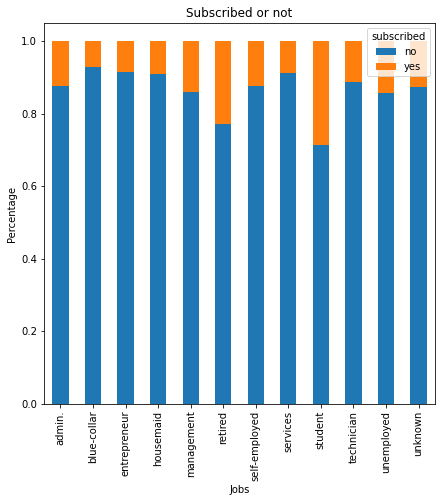

In [14]:
# Analysis between job vs subscribed
job = pd.crosstab(train['job'], train['subscribed'])
print(job)
job.div(job.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked = True, figsize=(7,7))
plt.xlabel('Jobs')
plt.ylabel('Percentage')
plt.title('Subscribed or not')

From the above graph we can infer that students and retired people have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.

Next, let's explore the default variable against the subscribed variable.

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

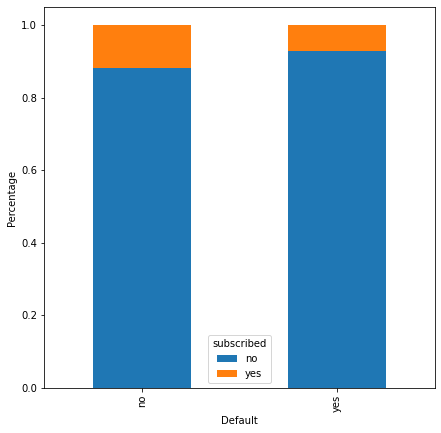

In [15]:
# Analysis between default vs subscribed
default = pd.crosstab(train['default'], train['subscribed'])
print(default)
default.div(default.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked= True, figsize = (7,7))
plt.xlabel('Default')
plt.ylabel('Percentage')

We can infer that clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.

Let's now look at how correlated our numerical variables are. We will see the correlation between each of these variables and the variable which have high negative or positive values are correlated. By this we can get an overview of the variables which might affect our target variable. We will convert our target variable into numeric values first.

In [16]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

In [17]:
corr = train.corr()
corr

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.296663
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.296663,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


<AxesSubplot:>

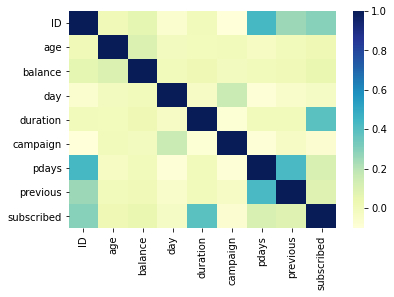

In [18]:
sns.heatmap(corr, vmax=1, cmap="YlGnBu")

We can infer that duration of the call is highly correlated with the target variable. This can be verified as well. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

Next, we will start to build our predictive model to predict whether a client will subscribe to a term deposit or not.

As the sklearn models takes only numerical input, we will convert the categorical variables into numerical values using dummies. We will remove the ID variables as they are unique values and then apply dummies. We will also remove the target variable and keep it in a separate variable.

# Model Building

In [19]:
target = train['subscribed']
train = train.drop(columns=['subscribed', 'ID'])

In [20]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown


In [21]:
train = pd.get_dummies(train)

In [22]:
train.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,56,1933,19,44,2,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,31,3,20,91,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,27,891,18,240,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,57,3287,22,867,1,84,3,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,31,119,4,380,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
print('hello')

hello


Now, its time to build our model. We will split the train data into training and validation set so that we will be able to validate the results of our model on the validation set. We will keep 20% data as validation set and rest as the training set.

In [24]:
# splitting into train and validation with 20% data in validation set and 80% data in train set.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train, target,test_size=0.2, random_state=12)

Now our data is ready. Its time to build our model and check its performance. Logistic regression is used for classification problems and as it is a classification problem let's first build a Logistic Regression model.

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [26]:
predict_value = lr.predict(X_test)
predict_value

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

We can see predicted values from 0 and 1 which states will subscribe and will not subscribe respectively.

In [27]:
predict_proba = lr.predict_proba(X_test)
predict_proba.shape

(6330, 2)

Here we can see column as 2 which shows 2 classes

In [28]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(Y_test, predict_value)
cf

array([[5473,  135],
       [ 550,  172]], dtype=int64)

it works as a matrix where we have 2 parameters actual and predicted with P(positive) N(negative) for each. Where,

TP -> 5473, FP -> 550, FN -> 135, TN -> 172 from these values we can see that it's an imbalanced data

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, predict_value)

0.891785150078989

We got an accuracy score of around 90% on the validation dataset. But since it's an imbalanced data we go on to find precision, recall

In [30]:
from sklearn.metrics import classification_report
cr = classification_report(Y_test, predict_value)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      5608
           1       0.56      0.24      0.33       722

    accuracy                           0.89      6330
   macro avg       0.73      0.61      0.64      6330
weighted avg       0.87      0.89      0.87      6330



We get precision, recall, f1-score values of classes 0 and 1

In [31]:
# calculating precision and recall for different possible threshold values between 0 and 1
from sklearn.metrics import precision_recall_curve
precision_points, recall_points, threshold_points = precision_recall_curve(Y_test, predict_proba[:,1])
precision_points.shape, recall_points.shape, threshold_points.shape

((6322,), (6322,), (6321,))

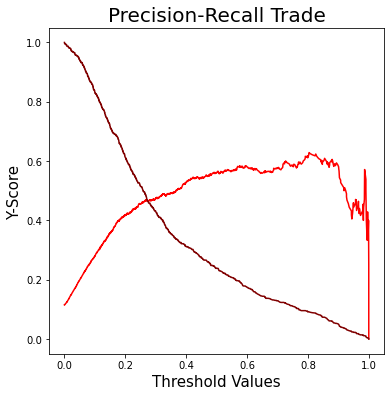

In [32]:
plt.figure(figsize=(6,6))
plt.plot(threshold_points,precision_points[:-1],color = '#FF0000', label = 'Precision Curve')
plt.plot(threshold_points,recall_points[:-1],color = '#800000', label = 'Precision Curve')
plt.xlabel('Threshold Values', fontsize = 15)
plt.ylabel('Y-Score', fontsize = 15)
plt.title('Precision-Recall Trade', fontsize = 20)
plt.show()

The threshold value is somewhere close to 0.3 

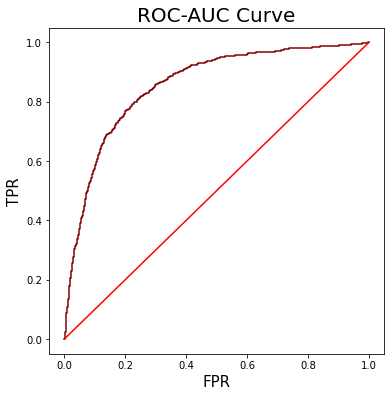

In [33]:
# Calculating Auc-Roc curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, threshold = roc_curve(Y_test, predict_proba[:,1])
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color = "#800000")
plt.plot([0, 1], [0, 1], label= "baseline", color = "red")
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize = 15)
plt.title('ROC-AUC Curve', fontsize = 20)
plt.show()

In [34]:
roc_auc_score(Y_test,predict_proba[:,1])

0.855278223432295

We get a value of 0.85 which is pretty good

Logistic regression has a linear decision boundary. What if our data have non linearity? We need a model that can capture this non linearity. 

Let's try decision tree algorithm now to check if we get better accuracy with that.
Accuracy for logistic regression -> 0.89

# Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight='balanced')
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [36]:
predict_dtc_train = dtc.predict(X_train)
predict_dtc_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Next thing is we go on to find the performance of the model by classification_report on the training set first.

In [37]:
print(classification_report(Y_train, predict_dtc_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22324
           1       1.00      1.00      1.00      2993

    accuracy                           1.00     25317
   macro avg       1.00      1.00      1.00     25317
weighted avg       1.00      1.00      1.00     25317



In [38]:
predict_dtc_test = dtc.predict(X_test)
predict_dtc_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
print(classification_report(Y_test, predict_dtc_test))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      5608
           1       0.44      0.50      0.47       722

    accuracy                           0.87      6330
   macro avg       0.69      0.71      0.70      6330
weighted avg       0.88      0.87      0.87      6330



We can see that the performance is good in training set but average in test set and the accuracy isn't same in both cases
reason can be due to overfitting. We perform some tuning(hyperparameters).

In [40]:
from sklearn.metrics import f1_score
def calc_score(model, x1, y1, x2, y2):
    model.fit(x1, y1)
    pred1 = model.predict(x1)
    f1 = f1_score(y1, pred1)
    pred2 = model.predict(x2)
    f2 = f1_score(y2, pred2)
    return f1, f2 

In [41]:
def effect(train_score, test_score, x_axis, title):
    plt.figure(figsize=(6, 5))
    plt.plot(x_axis, train_score,color = 'red', label='train_score')
    plt.plot(x_axis, test_score, color= 'green', label = 'test_score')
    plt.xlabel('parameter values')
    plt.ylabel('f1-scores')
    plt.title(title)
    

# max_depth
maxDepth = [i for i in range(1, 50)]
train_values = []
test_values = []
for i in maxDepth:
    model = DecisionTreeClassifier(class_weight='balanced', max_depth=i, random_state=42)
    f1, f2 = calc_score(model, X_train, Y_train, X_test, Y_test)
    train_values.append(f1)
    test_values.append(f2)

effect(train_values, test_values, range(1, 50), "max_depth")

We see that max_depth fot train and test increases gradualy, after some values train increases drastically and then becomes constant, and there by test goes constant and decreases.

# min_samples_split
minSamplesSplit = [i for i in range(2, 5000, 25)]
train_values = []
test_values = []
for i in minSamplesSplit:
    model = DecisionTreeClassifier(class_weight='balanced', min_samples_split=i, random_state=42)
    f1, f2 = calc_score(model, X_train, Y_train, X_test, Y_test)
    train_values.append(f1)
    test_values.append(f2)
effect(train_values, test_values, range(2, 5000, 25), "min_samples_split")

We can see that train decrease drasticall in the start, whereas test increases, after a moment both collides and becomes constant

# max_leaf_nodes
maxLeafNodes = [i for i in range(2, 200, 10)]
train_values = []
test_values = []
for i in maxLeafNodes:
    model = DecisionTreeClassifier(class_weight='balanced', max_leaf_nodes=i, random_state=42)
    f1, f2 = calc_score(model, X_train, Y_train, X_test, Y_test)
    train_values.append(f1)
    test_values.append(f2)
effect(train_values, test_values, range(2, 200, 10), "max_leaf_nodes")

We can see that test train increases drastically together in the start, then train and test goes on with constant increase.  

# min_sample_leaf
minSampleLeaf = [i for i in range(2, 4000, 25)]
train_values = []
test_values = []
for i in minSampleLeaf:
    model = DecisionTreeClassifier(class_weight='balanced', min_samples_leaf=i, random_state=42)
    f1, f2 = calc_score(model, X_train, Y_train, X_test, Y_test)
    train_values.append(f1)
    test_values.append(f2)
effect(train_values, test_values, range(2, 4000, 25), "min_sample_leaf")

We can see that train decreases drastically on the other hand test increases in the start then after some changes both decreases

In [42]:
dtc = DecisionTreeClassifier(max_depth=6, random_state=0)
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [43]:
predict_dtc_final = dtc.predict(X_test)

In [44]:
print(classification_report(Y_test, predict_dtc_final))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5608
           1       0.60      0.34      0.43       722

    accuracy                           0.90      6330
   macro avg       0.76      0.65      0.69      6330
weighted avg       0.88      0.90      0.89      6330



We can see that there is some increase or improvement in test data set with change in max depth

In [45]:
accuracy_score(Y_test, predict_dtc_final)

0.8990521327014218

We got an accuracy of more than 90% on the validation set. You can try to improve the score by tuning hyperparameters of the model. Let's now make the prediction on test dataset. We will make the similar changes in the test set as we have done in the training set before making the predictions.

In [46]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [47]:
test = pd.get_dummies(test)

In [48]:
test = test.drop(columns = ['ID'])

In [49]:
test.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,32,118,15,20,6,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,78,2787,1,372,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,31,144,16,676,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,57,3777,13,65,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,45,-705,3,111,1,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [50]:
predict_final_subscribe = dtc.predict(test)

In [55]:
submission = pd.DataFrame({'subscribe' : predict_final_subscribe})

In [56]:
submission['subscribe'].replace(0,'no',inplace=True)
submission['subscribe'].replace(1,'yes',inplace=True)

In [57]:
submission.to_csv('submission.csv', header=True, index=False)

# Final Prediction

In [58]:
final_predict = pd.read_excel("solution_checker.xlsx")